<a href="https://colab.research.google.com/github/arturossouza/UNISINOS-Colabs/blob/main/M%C3%A9todos_Matem%C3%A1ticos_Trabalho_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Data from Google Drive

In [103]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

worksheet_c1 = gc.open('transmiss_covid_clima_C1').sheet1
worksheet_c4 = gc.open('transmiss_covid_clima_C4').sheet1

# get_all_values gives a list of rows.
rows_c1 = worksheet_c1.get_all_values()
rows_c4 = worksheet_c4.get_all_values()

# Convert to a DataFrame and render.
import pandas as pd
c1_data_df = pd.DataFrame.from_records(rows_c1,columns=rows_c1[0])
c4_data_df = pd.DataFrame.from_records(rows_c4,columns=rows_c4[0])

# Cleaning Dataset

In [104]:
translate_dict = {
    "Média de Temp. [Hora] (C)": "Avg Temp. [Hour] (°C)",
    "Média de Umi. (%)": "Avg Humidity (%)",
    "Média de Pressao (hPa)": "Avg Pressure (hPa)",
    "Média de Nebulosidade (Decimos)": "Avg Nebulosity (Tenth)",
    "Média de Insolacao (h)": "Avg Insolation (h)",
    "Média de Chuva [Diaria] (mm)": "Avg Rain [Daily] (mm)",
    "Média de Vel. Vento (m/s)": "Avg Wind Speed (m/s)"
}

In [105]:
def adjusting_dataframe (df):
  df = df.iloc[1: , :]

  for column in df.columns:
    if column == "DATA":
      df[column] = df[column].str.replace('.', '')
    else:  
      df[column] = pd.to_numeric(df[column].str.replace(',', '.'))

  return df

def translate_df (df):
  try:
    if "Taxa_casos_covid_C4" in translate_dict.keys(): del translate_dict["Taxa_casos_covid_C4"]
    translate_dict["Taxa_casos_covid_C1"] = "Covid Taxes of C1"
    df.rename(columns=translate_dict, inplace=True, errors="raise")
  except:
    if "Taxa_casos_covid_C1" in translate_dict.keys(): del translate_dict["Taxa_casos_covid_C1"]
    translate_dict["Taxa_casos_covid_C4"] = "Covid Taxes of C4"
    df.rename(columns=translate_dict, inplace=True, errors="raise")




In [106]:
c1_clean_df = adjusting_dataframe(c1_data_df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [107]:
translate_df(c1_clean_df)

c1_clean_df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,DATA,Avg Temp. [Hour] (°C),Avg Humidity (%),Avg Pressure (hPa),Avg Nebulosity (Tenth),Avg Insolation (h),Avg Rain [Daily] (mm),Avg Wind Speed (m/s),Covid Taxes of C1
1,01/jan,24.00,94.00,987.90,10.00,NaN,39.4,1.00,NaN
2,02/jan,27.70,82.50,987.85,9.50,4.2,0.4,1.00,NaN
3,03/jan,25.53,88.67,989.43,9.67,2.0,10.0,1.33,NaN
4,04/jan,25.30,86.00,990.00,10.00,NaN,16.7,1.00,NaN
5,05/jan,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
362,27/dez,23.60,92.00,985.60,10.00,NaN,NaN,1.00,0.00
363,28/dez,27.40,83.00,988.50,8.80,0.0,0.0,2.10,0.37
364,29/dez,23.75,93.00,987.75,10.00,0.0,15.2,1.00,28.64
365,30/dez,26.65,87.50,986.35,10.00,0.0,0.0,1.55,7.07


In [108]:
c1_clean_df.dtypes

DATA                       object
Avg Temp. [Hour] (°C)     float64
Avg Humidity (%)          float64
Avg Pressure (hPa)        float64
Avg Nebulosity (Tenth)    float64
Avg Insolation (h)        float64
Avg Rain [Daily] (mm)     float64
Avg Wind Speed (m/s)      float64
Covid Taxes of C1         float64
dtype: object

In [109]:
c4_clean_df = adjusting_dataframe(c4_data_df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [110]:
translate_df(c4_clean_df)

c4_clean_df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,DATA,Avg Temp. [Hour] (°C),Avg Humidity (%),Avg Pressure (hPa),Avg Nebulosity (Tenth),Avg Insolation (h),Avg Rain [Daily] (mm),Avg Wind Speed (m/s),Covid Taxes of C4
1,01/jan,27.90,83.00,1009.50,6.9,NaN,8.6,1.00,NaN
2,02/jan,28.07,81.67,1009.60,7.5,3.3,32.7,1.00,NaN
3,03/jan,26.40,88.67,1011.37,7.5,0.0,2.6,1.00,NaN
4,04/jan,28.47,81.00,1011.37,7.1,6.9,4.8,0.67,NaN
5,05/jan,26.00,91.00,1012.05,7.5,3.7,4.8,1.00,NaN
...,...,...,...,...,...,...,...,...,...
363,27/dez,28.47,74.67,1007.63,7.1,4.8,0.2,1.00,1.69
364,28/dez,28.07,81.33,1008.87,7.5,1.6,0.4,1.00,8.44
365,29/dez,27.20,85.67,1008.53,7.5,0.3,10.0,0.67,16.46
366,30/dez,28.67,80.33,1009.00,7.5,3.2,0.4,0.67,12.38


In [111]:
c4_clean_df.dtypes

DATA                       object
Avg Temp. [Hour] (°C)     float64
Avg Humidity (%)          float64
Avg Pressure (hPa)        float64
Avg Nebulosity (Tenth)    float64
Avg Insolation (h)        float64
Avg Rain [Daily] (mm)     float64
Avg Wind Speed (m/s)      float64
Covid Taxes of C4         float64
dtype: object

# Looking for Correlations

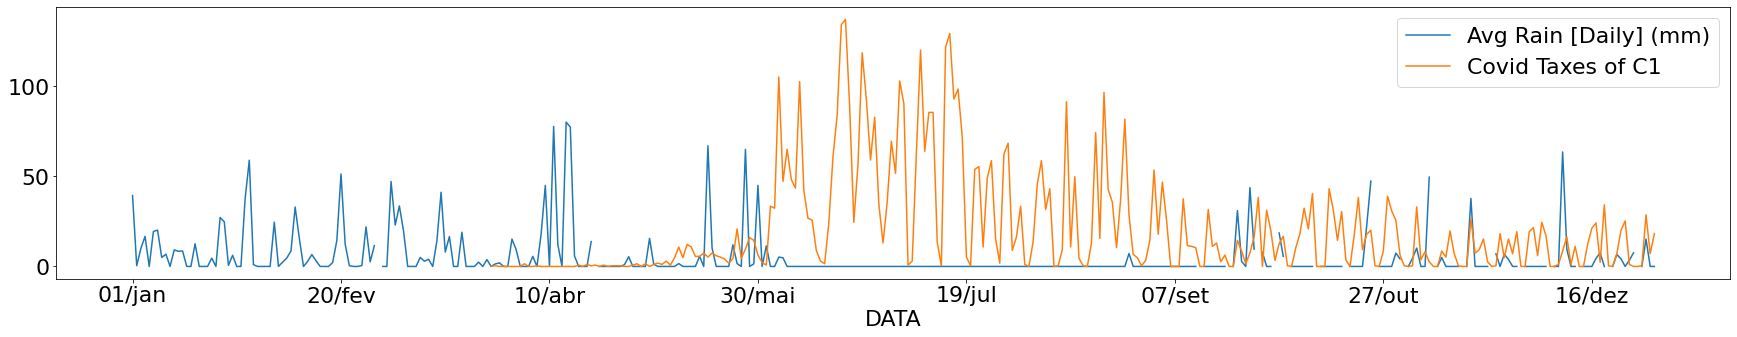

In [112]:
c1_clean_df.plot(kind="line", figsize=(30, 5), x="DATA", y=["Avg Rain [Daily] (mm)", "Covid Taxes of C1"])

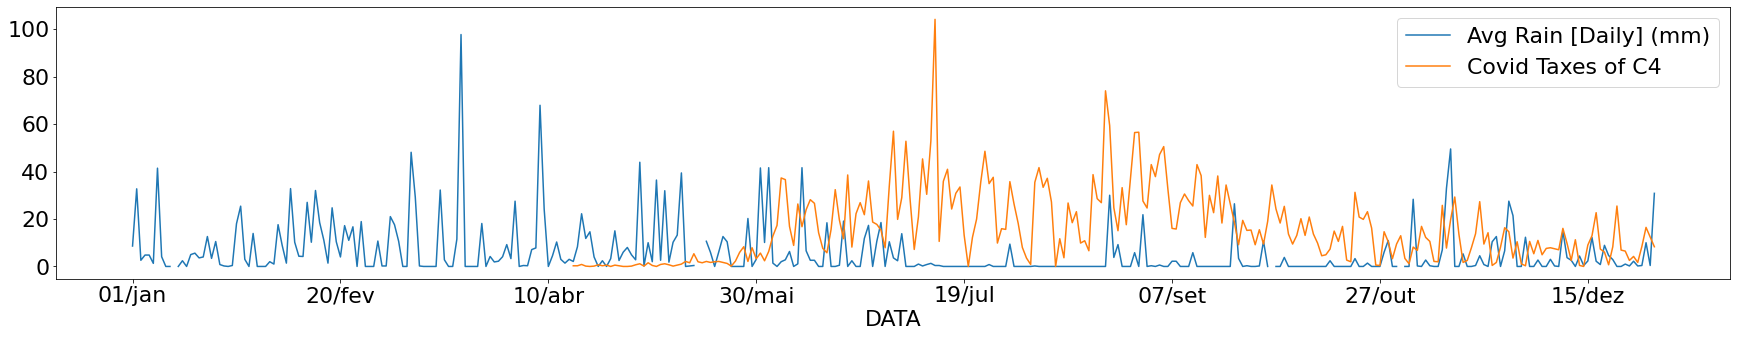

In [113]:
c4_clean_df.plot(kind="line", figsize=(30, 5), x="DATA", y=["Avg Rain [Daily] (mm)", "Covid Taxes of C4"])

In [121]:
def slice_period (df, begin, end):
  first_day_index = df[df["DATA"] == begin].index
  last_day_index = df[df["DATA"] == end].index
  sliced_df = df.iloc[first_day_index[0] : last_day_index[0], :]

  try:
    sliced_df.plot(kind="line", figsize=(30, 5), x="DATA", y=["Avg Rain [Daily] (mm)","Covid Taxes of C1"])
  except:
    sliced_df.plot(kind="line", figsize=(30, 5), x="DATA", y=["Avg Rain [Daily] (mm)","Covid Taxes of C4"])
  finally:
    return sliced_df 

# Tool to search relation between Média de Chuva x Taxa de Casos de Covida in some date

In [115]:
#@title Choose a period to be analised

df =  c1_clean_df #@param {type:"raw"}
first_date = "30/mai" #@param {type:"raw"}
last_date = "30/set" #@param {type:"raw"}

slice_period(df, first_date, last_date)

,DATA,Avg Temp. [Hour] (°C),Avg Humidity (%),Avg Pressure (hPa),Avg Nebulosity (Tenth),Avg Insolation (h),Avg Rain [Daily] (mm),Avg Wind Speed (m/s),Covid Taxes of C1
152,31/mai,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2.23
153,01/jun,28.65,80.00,990.15,5.65,8.6,11.4,1.55,0.74
154,02/jun,27.27,84.67,989.93,5.00,5.3,0.0,1.37,33.48
155,03/jun,27.50,86.00,989.90,5.83,7.2,0.0,1.70,32.36
156,04/jun,27.30,83.33,990.30,8.77,7.0,5.2,1.00,105.27
...,...,...,...,...,...,...,...,...,...
270,26/set,23.20,90.00,989.45,10.00,3.5,9.6,1.00,16.37
271,27/set,27.40,91.00,987.80,7.50,NaN,NaN,0.00,38.31
272,28/set,27.40,79.00,987.80,2.50,7.5,7.8,1.00,0.00
273,29/set,28.10,79.50,987.65,6.90,9.1,0.0,0.50,31.25


# Datasets in a specific period of analysis

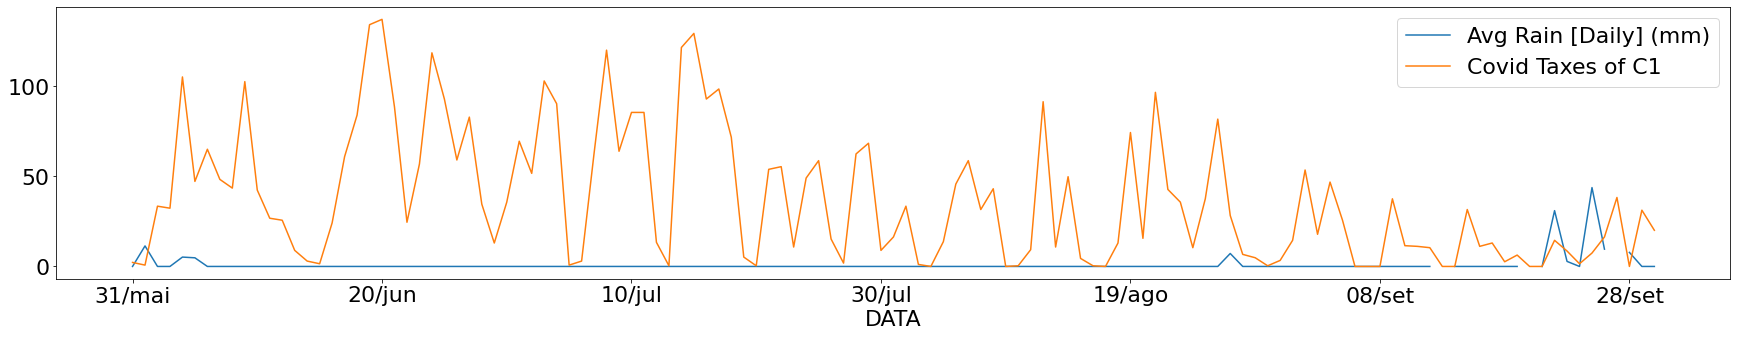

In [127]:
c1_sliced_df = slice_period(c1_clean_df, "30/mai", "30/set")

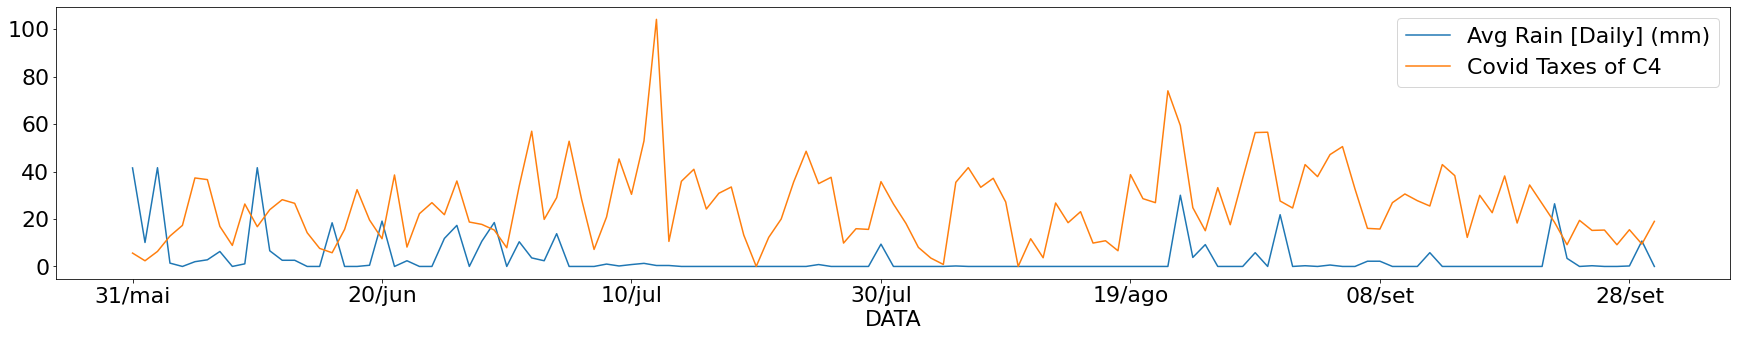

In [128]:
c4_sliced_df = slice_period(c4_clean_df, "30/mai", "30/set")

In [129]:
import seaborn as sn

import matplotlib.pyplot as plt

In [151]:
def plot_df_correlation(df1, df2, correlation_type):

  df1_corr = df1.corr(method=correlation_type)
  df2_corr = df2.corr(method=correlation_type)

  plt.rcParams.update({'font.size': 22})

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(50,20))  
  fig.suptitle(f"{correlation_type.capitalize()} Correlation")

  ax1.set_title('Cluster 1')
  ax2.set_title('Cluster 4')

  sn.heatmap(df1_corr, annot=True, ax=ax1)
  sn.heatmap(df2_corr, annot=True, ax=ax2)

  plt.savefig(f"{correlation_type}_correlation.JPG", transparent=True, dpi=300, bbox_inches='tight')


Here we are looking for correlation from the first record of covid taxes untill the end of the year.

In [132]:
index_first_day_of_cases = c1_sliced_df[c1_sliced_df["Covid Taxes of C1"] > 0]["DATA"].index.min()

c1_to_corr_df = c1_sliced_df[c1_sliced_df.index >= index_first_day_of_cases]

In [133]:
index_first_day_of_cases = c4_sliced_df[c4_sliced_df["Covid Taxes of C4"] > 0]["DATA"].index.min()

c4_to_corr_df = c4_sliced_df[c4_sliced_df.index >= index_first_day_of_cases]

## Pearson Correlation

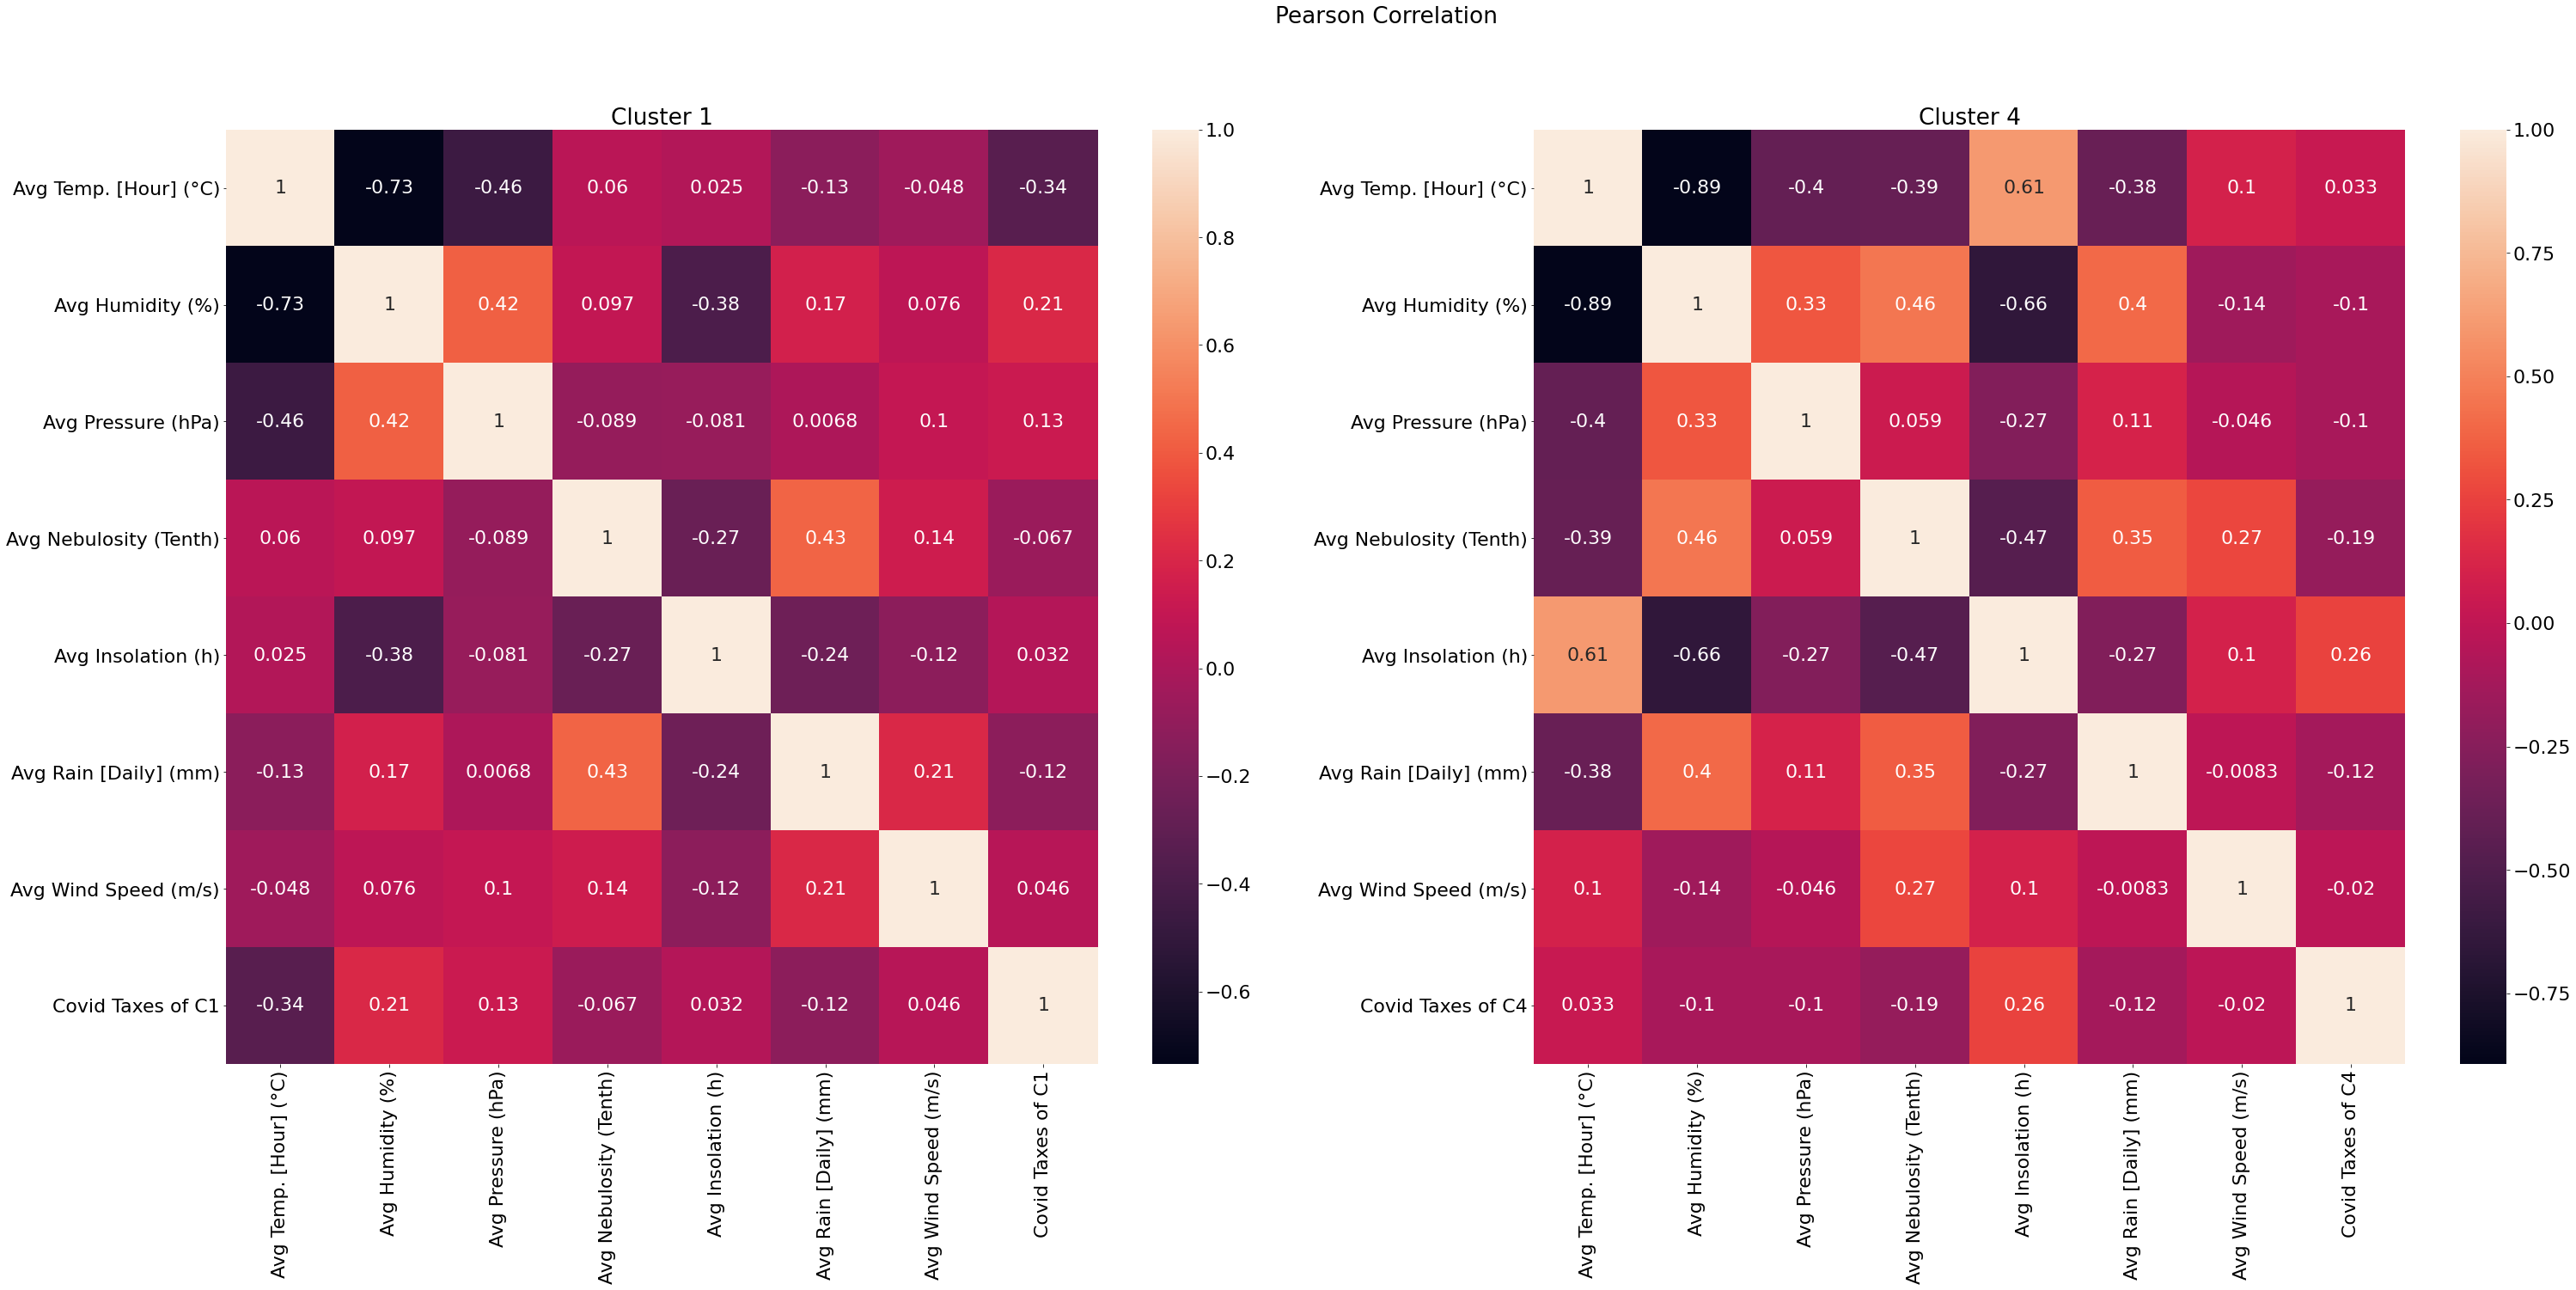

In [152]:
plot_df_correlation(c1_to_corr_df, c4_to_corr_df, "pearson")

## Kendall Correlation

In [ ]:
plot_df_correlation(c1_to_corr_df, c4_to_corr_df, "kendall")

## Spearman Correlation

In [ ]:
plot_df_correlation(c1_to_corr_df, c4_to_corr_df, "spearman")

# Looking for Correlations between the two clusters

In [ ]:
def renaming_columns(df, label):

  changes = {}
  for column in df.columns:
    if (column != "DATA" and column != "Taxa_casos_covid_C1" and column != "Taxa_casos_covid_C4"):
      changes[column] = column + label

  renamed_df = df.rename(columns = changes)

  return renamed_df

In [ ]:
label_c1_df = renaming_columns(c1_clean_df, "_C1")

In [ ]:
label_c1_df.columns

In [ ]:
c1_clean_df.columns

In [ ]:
label_c4_df = renaming_columns(c4_clean_df, "_C4")

In [ ]:
label_c4_df.columns

In [ ]:
c4_clean_df.columns

In [ ]:
index_first_day_of_cases = label_c1_df[label_c1_df["Taxa_casos_covid_C1"] > 0]["DATA"].index.min()

c1_label_to_join_df = label_c1_df[label_c1_df.index >= index_first_day_of_cases]

c1_label_to_join_df.head()

In [ ]:
index_first_day_of_cases = label_c4_df[label_c4_df["Taxa_casos_covid_C4"] > 0]["DATA"].index.min()

c4_label_to_join_df = label_c4_df[label_c4_df.index >= index_first_day_of_cases]

c1_label_to_join_df.head()

In [ ]:
c1_label_to_join_df.set_index("DATA", inplace=True)

In [ ]:
c4_label_to_join_df.set_index("DATA", inplace=True)

In [ ]:
super_table_df = pd.concat([c1_label_to_join_df, c4_label_to_join_df], axis=1, keys="DATA")

In [ ]:
table_corr_df = super_table_df.corr(method="pearson") 

plt.rcParams.update({'font.size': 22})

fig, ax1 = plt.subplots(figsize=(50,20)) 

sn.heatmap(table_corr_df, annot=True, ax=ax1)

PS.: I just notice that this analysis doesn`t make sense because C! and C2 are different regions. There is no way that climatic features of one cluster affect the other.